In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

In [ ]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['target'] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split

X  = iris.drop(['target'], axis=1)
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC, SVR
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_c.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

- **C** es el parámetro de Coste (que regula el impacto de las variables de holgura y ayuda a regularizar el modelo.

- **kernel** indica que kernel usar (rbf, radial basis function por defecto). Se puede usar cualquier kernel definido por nosotros, por defecto SVC conoce rbf(fgaussian), poly (polinomial), linear (lineal) o sigmoid (sigmoide).
- **class_weight**, nos permite pasar un diccionario de la forma {clase:peso} que permite asignar más peso a una clase que a otra. Para problemas con clases no balanceadas, podemos usar el parámetro 'balanced' para que se ajusten los pesos en función del número de casos de cada clase.
- **decision_function_shape** si usar una estrategia de uno contra uno (ovo) o uno contra todos (one versus rest, ovr) en casos de clasificación multiclase.
- **cache_size** es el tamaño (en megabytes) del caché del modelo (cuantos datos puede guardar en memoria y reutilizarlos sin tener que calcularlos). SVMs son computacionalmente complejos asi que si hay mas memoria disponible mejor incrementarl este valor(por ejemplo, a 1000mb o 2000mb)

El parámetro support_vectors_ nos devuelve los vectores soporte.



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
cross_val_score(svm_c, X, y, cv=10, scoring='f1_macro')



array([1.        , 0.93265993, 1.        , 1.        , 1.        ,
       0.93265993, 0.93265993, 0.93265993, 1.        , 1.        ])

In [ ]:
svm_c.support_vectors_ # These are the vectors in the limitis of the decision boundary

array([[5.1, 3.8, 1.9, 0.4],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.5, 2.3, 1.3, 0.3],
       [6.7, 3.1, 4.4, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [6.6, 3. , 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5. , 2. , 3.5, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [5. , 2.3, 3.3, 1. ],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [6. , 2.7, 5.1, 1.6],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6.5, 2.8, 4.6, 1.5],
       [7. , 3.2, 4.7, 1.4],
       [5.9, 3. , 4.2, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [6.1, 3. , 4.6, 1.4],
       [6.6, 2.9, 4.6, 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [4.9, 2.4, 3.3, 1. ],
       [6.9, 3.1, 4.9, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [6.3, 2.5, 5. , 1.9],
       [5.8, 2.7, 5.1, 1.9],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3

El parámetro n_support_ nos dice cuantos vectores soporte (es decir, puntos tocando el margen del hiperplano de decisión) existen por clase, esto nos da una medida de cuan faciles son de separar cada clase.

In [ ]:
svm_c.n_support_  # vectores de soporte son los que vectores que quedan en los limites del hiperplano, en este caso dice que
# 5 obs de clase 0 quedaorn en el hiperplano, 26 de clase 1 y 22 de clase 2
# esto quiere decir que clase 0 esrta mas separada de las otras dos clasificaciones, mientras que las clases 1 y 2 estan mas juntas

array([ 5, 26, 22], dtype=int32)

#**Kernels**
Vamos a ver el efecto que tienen diferentes kernels en la creación del hiperplano de decisión.

Para verlo en un gráfico de dispersión tomamos solo las dos primeras variables del dataset (longitud y grosor del sépalo).

In [ ]:
X = data.data[:,:2]
y = data['target']

In [ ]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

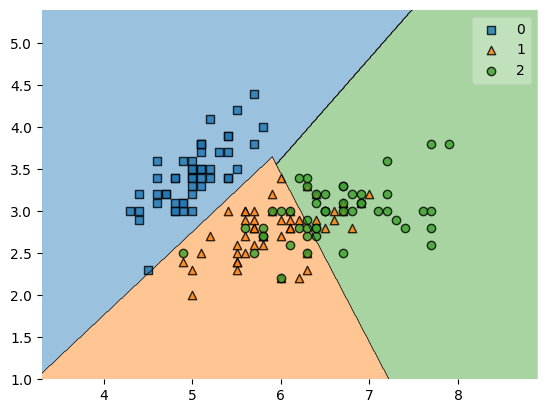

In [ ]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X, y)
plot_decision_regions(X, y, clf=svc_linear)

<Axes: >

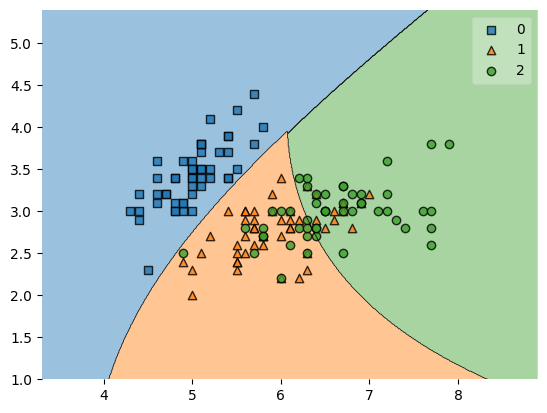

In [ ]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X, y)
plot_decision_regions(X, y, clf=svc_poly)

<Axes: >

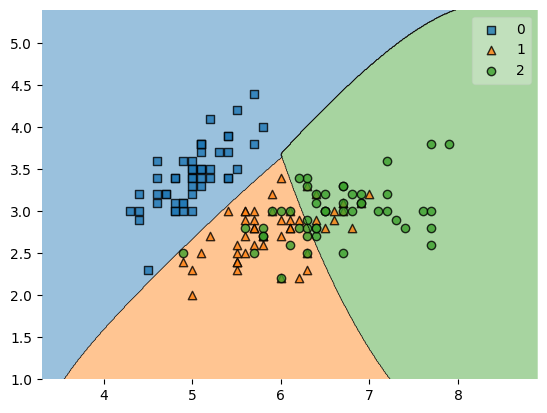

In [ ]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X, y)
plot_decision_regions(X, y, clf=svc_rbf)

<Axes: >

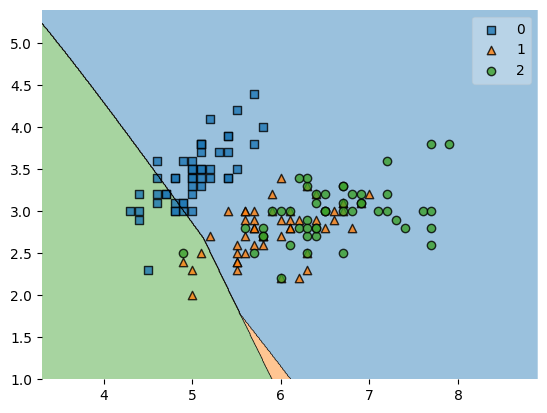

In [ ]:
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X, y)
plot_decision_regions(X, y, clf=svc_sigmoid)

Podemos ver como varia la frontera de decisión en función de los grados de expansión. Cuantos más grados más complejo podrá ser el hiperplano. Con grado 1 se convierte en un kernel lineal.

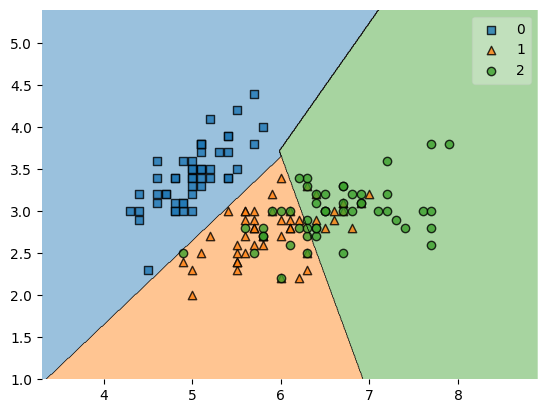

In [ ]:
estimador_svm_polinomial = SVC(kernel="poly", degree=1).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial); # poly degree 1 is equal to the lineal

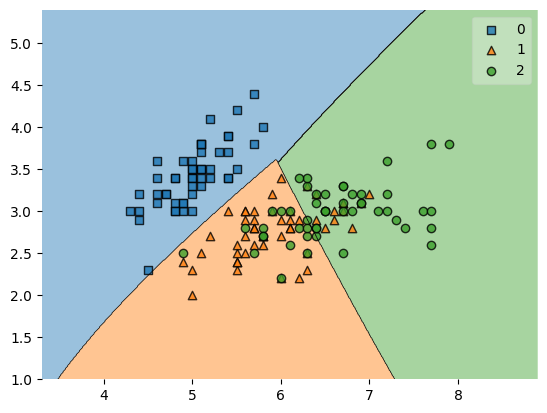

In [ ]:
estimador_svm_polinomial = SVC(kernel="poly", degree=2).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial);

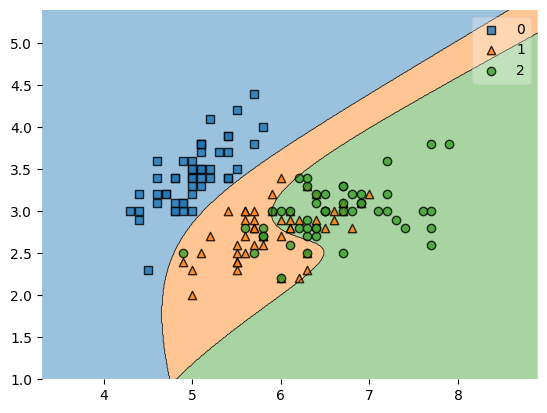

In [ ]:
estimador_svm_polinomial = SVC(kernel="poly", degree=10).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial);

El kernel polinomial tiene también el parámetro que lo regula, alpha en la ecuación de arriba, aunque en la implementación de scikit-learn se llama gamma

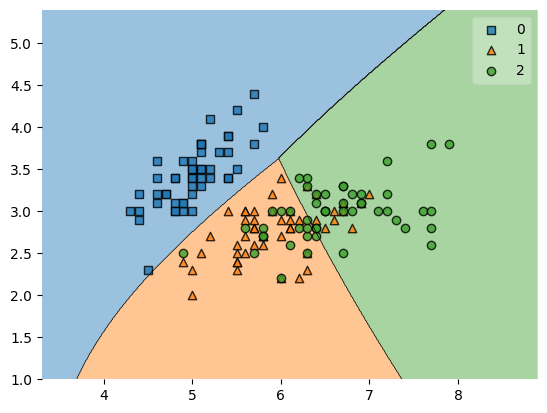

In [ ]:
estimador_svm_polinomial = SVC(kernel="poly", degree=3, gamma=0.1).fit(X, y)
plot_decision_regions(X, y, clf=estimador_svm_polinomial);

Vemos que un gamma bajo reduce la complejidad del kernel polinomial convirtiendolo prácticamente en lineal. Si no se especifica se usa gamma=1/n_variables, o sea en este caso 1/2

El kernel gausiano (radial basis function, o rbf) hace una transformacion radial (esto es, en funcion de la distancia de los puntos al origen).

<Axes: >

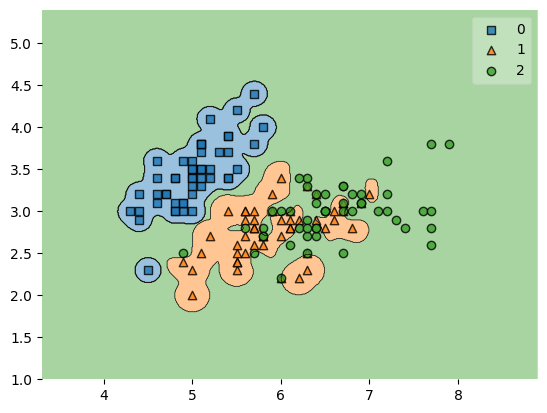

In [ ]:
smv_rbf_gamma100 = SVC(kernel='rbf', gamma=100).fit(X, y)
plot_decision_regions(X, y, clf=smv_rbf_gamma100)
# There is ovberfit

In [ ]:
# When the  odel is overfitted ocuur the next:
cross_val_score(smv_rbf_gamma100, X, y, cv=10, scoring='f1_macro') # the scoring is low

array([0.52861953, 0.66809117, 0.55084175, 0.61666667, 0.66809117,
       0.58333333, 0.73809524, 0.7979798 , 0.61666667, 0.66329966])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters ={
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': randint(1, 5),
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

search = RandomizedSearchCV(SVC(),
                            parameters,
                            n_iter=10,
                            n_jobs=-1,
                            scoring='f1_micro')

search.fit(X, y)


RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bd6df3c3650>,
                                        'gamma': [0.001, 0.01, 0.1, 1, 10],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   scoring='f1_micro')

In [ ]:
print(search.best_params_)
print(search.best_score_)

{'degree': 3, 'gamma': 10, 'kernel': 'poly'}
0.8133333333333332


In [ ]:
cross_val_score(SVC(kernel='rbf',gamma=1/(2*X.var())),X, y, cv=10, scoring='f1_micro').mean()

np.float64(0.8266666666666668)

In [ ]:
cross_val_score(SVC(), X, y, cv=10, scoring='f1_micro').mean()

np.float64(0.8266666666666668)

In [ ]:
cross_val_score(SVC(decision_function_shape='ovo'), X, y, cv=10, scoring='f1_micro').mean()

np.float64(0.8266666666666668)